In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing

# Configuración warnings
# ==============================================================================
import warnings

In [2]:
datos=pd.read_csv('train.csv')
datos.columns

Index(['Unnamed: 0', 'red_card_continent', 'age', 'nation', 'league', 'team',
       'goals_selection', 'selections_nation', 'position', 'price',
       'goal_champ', 'assist_champ', 'own_goal_champ', 'yellow_card_champ',
       'second_yellow_card_champ', 'red_card_champ', 'goal_cup', 'assist_cup',
       'own_goal_cup', 'yellow_card_cup', 'second_yellow_card_cup',
       'red_card_cup', 'goal_continent', 'assist_continent',
       'own_goal_continent', 'yellow_card_continent',
       'second_yellow_card_continent'],
      dtype='object')

In [19]:
datos.sample(20)

,red_card_continent,age,nation,league,team,goals_selection,selections_nation,position,price,goal_champ,...,assist_cup,own_goal_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,goal_continent,assist_continent,own_goal_continent,yellow_card_continent,second_yellow_card_continent
3165,0.0,26,Italy,SerieA,ASRoma,3,23,LeftWinger,22000000.0,78.0,...,6.0,0.0,1.0,0.0,0.0,8.0,6.0,0.0,2.0,0.0
4056,0.0,29,Romania,SüperLig,Sivasspor,11,56,RightWinger,850000.0,41.0,...,6.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,0.0,26,Thailand,ThaiLeague,PTPrachuapFC,0,0,DefensiveMidfield,75000.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5860,0.0,35,Montenegro,Liga1,PersibBandung,0,0,AttackingMidfield,75000.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6095,0.0,23,Montenegro,SerieA,SPAL,0,9,RightWinger,2250000.0,16.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0
6915,0.0,22,Fiji,PremierLeague,TavuaFC,0,0,Defender,75000.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2456,0.0,25,SaudiArabia,ProfessionalLeague,OhodAl0Medina,0,0,RightWinger,25000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3974,0.0,24,Uruguay,PrimeraDivisión,PlazaColonia,0,0,CentralMidfield,125000.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6981,0.0,24,Morocco,BotolaPro,Berrechid,0,0,DefensiveMidfield,100000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8438,0.0,24,Tunisia,LigueIPro,USBenGuerdane,0,0,CentralMidfield,200000.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
datos

,red_card_continent,age,nation,league,team,goals_selection,selections_nation,position,price,goal_champ,...,assist_cup,own_goal_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,goal_continent,assist_continent,own_goal_continent,yellow_card_continent,second_yellow_card_continent
0,0.0,23,Tunisia,Ligue1,OGCNice,0,4,Goalkeeper,1000000.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
1,0.0,20,CzechRepublic,FortunaLiga,1.FKPribram,0,1,LeftWinger,100000.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,31,Canada,SuperLiga,RedStar,0,40,Goalkeeper,3000000.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,25.0
3,0.0,22,Belgium,JupilerProLeague,ClubBrugge,4,18,SecondStriker,4000000.0,33.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
4,0.0,29,Ukraine,PremierLiga,Chornomorets,0,0,LeftMidfield,500000.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,0.0,24,Russia,PremierLiga,ArsenalTula,0,0,Goalkeeper,125000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8893,0.0,24,Uruguay,PrimeraDivisión,Argentinos,0,0,AttackingMidfield,300000.0,12.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8894,0.0,29,Argentina,PrimeraDivisión,Defensa,0,11,Goalkeeper,800000.0,0.0,...,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0
8895,0.0,29,Argentina,SuperLeague,ApollonSmyrnis,1,2,AttackingMidfield,300000.0,19.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
train_labels=['red_card_continent', 'age', 'nation', 'league', 'team',
       'goals_selection', 'selections_nation', 'position', 'price',
       'goal_champ', 'assist_champ', 'own_goal_champ', 'yellow_card_champ',
       'second_yellow_card_champ', 'red_card_champ', 'goal_cup', 'assist_cup',
       'own_goal_cup', 'yellow_card_cup', 'second_yellow_card_cup',
       'red_card_cup', 'goal_continent', 'assist_continent',
       'own_goal_continent', 'yellow_card_continent',
       'second_yellow_card_continent']
datos=datos[train_labels]
#datos.mean(axis=0)

In [29]:
datos.isna().any()
datos

red_card_continent              False
age                             False
nation                          False
league                          False
team                            False
goals_selection                 False
selections_nation               False
position                        False
price                           False
goal_champ                      False
assist_champ                    False
own_goal_champ                  False
yellow_card_champ               False
second_yellow_card_champ        False
red_card_champ                  False
goal_cup                        False
assist_cup                      False
own_goal_cup                    False
yellow_card_cup                 False
second_yellow_card_cup          False
red_card_cup                    False
goal_continent                  False
assist_continent                False
own_goal_continent              False
yellow_card_continent           False
second_yellow_card_continent    False
dtype: bool

In [30]:
pd.isnull(datos).sum() > 0

red_card_continent              False
age                             False
nation                          False
league                          False
team                            False
goals_selection                 False
selections_nation               False
position                        False
price                           False
goal_champ                      False
assist_champ                    False
own_goal_champ                  False
yellow_card_champ               False
second_yellow_card_champ        False
red_card_champ                  False
goal_cup                        False
assist_cup                      False
own_goal_cup                    False
yellow_card_cup                 False
second_yellow_card_cup          False
red_card_cup                    False
goal_continent                  False
assist_continent                False
own_goal_continent              False
yellow_card_continent           False
second_yellow_card_continent    False
dtype: bool

In [31]:
datos.isnull().sum()

red_card_continent              0
age                             0
nation                          0
league                          0
team                            0
goals_selection                 0
selections_nation               0
position                        0
price                           0
goal_champ                      0
assist_champ                    0
own_goal_champ                  0
yellow_card_champ               0
second_yellow_card_champ        0
red_card_champ                  0
goal_cup                        0
assist_cup                      0
own_goal_cup                    0
yellow_card_cup                 0
second_yellow_card_cup          0
red_card_cup                    0
goal_continent                  0
assist_continent                0
own_goal_continent              0
yellow_card_continent           0
second_yellow_card_continent    0
dtype: int64

In [34]:
text_labels=[ 'nation', 'league', 'team',
        'position']
le = preprocessing.LabelEncoder()
datos[text_labels] = datos[text_labels].apply(le.fit_transform)

In [35]:
#encoded_series
datos

,red_card_continent,age,nation,league,team,goals_selection,selections_nation,position,price,goal_champ,...,assist_cup,own_goal_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,goal_continent,assist_continent,own_goal_continent,yellow_card_continent,second_yellow_card_continent
0,0.0,23,142,36,684,0,4,5,1000000.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
1,0.0,20,36,18,1,0,1,7,100000.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,31,20,58,800,0,40,5,3000000.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,25.0
3,0.0,22,10,25,257,4,18,11,4000000.0,33.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
4,0.0,29,147,46,251,0,0,6,500000.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,0.0,24,119,46,97,0,0,5,125000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8893,0.0,24,150,50,91,0,0,0,300000.0,12.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8894,0.0,29,4,50,280,0,11,5,800000.0,0.0,...,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0
8895,0.0,29,4,57,87,1,2,0,300000.0,19.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
datos.var(axis=0)

red_card_continent              3.461956e+00
age                             2.080918e+01
goals_selection                 6.983557e+00
selections_nation               2.246975e+02
price                           4.576881e+13
goal_champ                      3.542244e+02
assist_champ                    2.279377e+02
own_goal_champ                  1.305937e-01
yellow_card_champ               3.178445e+02
second_yellow_card_champ        8.442525e-01
red_card_champ                  6.713783e-01
goal_cup                        4.915608e+00
assist_cup                      3.574688e+00
own_goal_cup                    2.057669e-02
yellow_card_cup                 3.997688e+00
second_yellow_card_cup          3.305387e-02
red_card_cup                    3.537689e+01
goal_continent                  5.163469e+00
assist_continent                3.610968e+00
own_goal_continent              9.487526e-03
yellow_card_continent           3.668386e+00
second_yellow_card_continent    4.107279e+01
dtype: flo

In [36]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [37]:
modelo_pca = pca_pipe.named_steps['pca']

In [38]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8','PC9', 'PC10',
               'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
               'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26']
)

,red_card_continent,age,nation,league,team,goals_selection,selections_nation,position,price,goal_champ,...,assist_cup,own_goal_cup,yellow_card_cup,second_yellow_card_cup,red_card_cup,goal_continent,assist_continent,own_goal_continent,yellow_card_continent,second_yellow_card_continent
PC1,0.004334,0.168566,-0.010273,0.024508,-0.015879,0.263952,0.252388,-0.015338,0.199228,0.315735,...,0.260125,-0.005194,0.227309,0.084259,-0.029576,0.292371,0.304791,0.024993,0.275249,-0.003826
PC2,0.510877,0.252045,0.012009,0.029479,-0.023255,-0.050287,0.148842,-0.029215,0.002522,-0.095334,...,-0.090141,0.183171,-0.010907,0.089081,0.389835,-0.070116,-0.059316,0.231029,0.008021,0.525670
PC3,0.194749,-0.244870,0.037754,-0.014848,0.040180,0.276150,0.180501,0.193570,0.255127,0.030060,...,0.042874,0.018046,-0.239387,-0.127137,0.092660,0.265157,0.235494,0.055241,-0.031589,0.192808
PC4,0.033866,-0.035343,0.238608,0.317039,-0.073971,-0.139322,-0.115487,0.124458,-0.096866,-0.096842,...,0.433291,0.161510,0.400591,0.319594,0.116523,-0.121826,-0.101174,-0.042709,-0.096615,0.038547
PC5,-0.047394,-0.279354,0.005519,0.230882,-0.088356,-0.007888,0.010216,-0.478643,0.272823,-0.328798,...,-0.137340,0.041175,0.155379,0.280209,-0.030174,0.156467,0.190499,0.118403,0.349057,-0.053656
PC6,-0.272518,0.103636,0.146627,-0.039205,-0.000576,0.164197,0.063233,0.070168,-0.017148,0.007803,...,-0.149334,0.616953,-0.131432,0.170600,0.366349,0.099902,0.055433,-0.386745,-0.015571,-0.236837
PC7,0.014987,-0.086938,0.042549,-0.497186,0.750602,-0.046889,-0.034841,-0.257628,0.090487,-0.047311,...,0.155741,0.067087,0.140202,0.084993,0.034626,-0.055562,-0.027867,0.018569,-0.019487,0.016163
PC8,0.036859,-0.012160,-0.814038,-0.207451,-0.138559,-0.195377,-0.270219,0.148503,0.128564,0.018541,...,0.051987,0.210562,0.043502,0.199470,0.064759,0.068009,0.056817,-0.028050,0.049971,0.020746
PC9,-0.029053,-0.044247,0.087129,-0.370488,-0.543621,-0.010803,-0.022033,-0.271970,0.128608,-0.004180,...,0.145232,-0.027725,0.043579,-0.139111,-0.033717,-0.062571,-0.058178,0.002537,-0.092991,-0.010544
PC10,0.116712,-0.061029,0.185219,-0.505367,-0.257171,0.140388,0.184159,0.043324,-0.082323,0.013938,...,-0.104981,-0.159231,0.013096,0.552944,-0.109098,-0.050484,-0.063346,-0.191314,-0.053615,0.104810


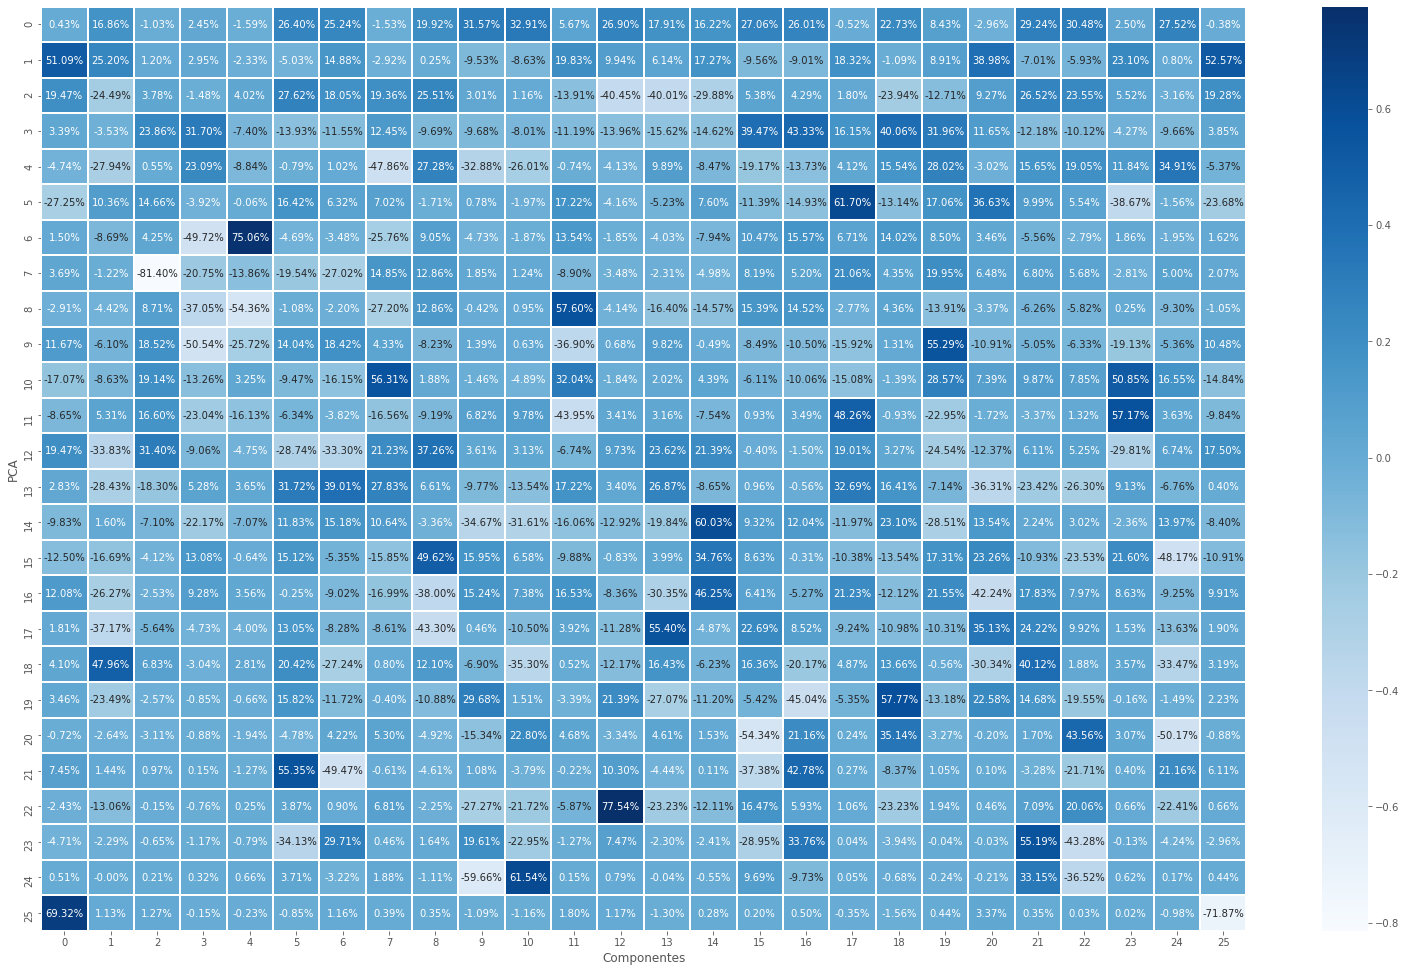

In [39]:
aux=modelo_pca.components_
plt.figure(figsize = (27,17))
ax = sns.heatmap(aux, annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Componentes');ax.set_ylabel('PCA'); 
#ax.set_title('Confusion Matrix'); 